In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = None # Displays all rows
pd.options.display.max_columns = None # Displays all columns

## Data Gathering 

Data was available on the Kaggle website (https://www.kaggle.com/aungpyaeap/supermarket-sales)

In [2]:
df = pd.read_csv("supermarket_sales.csv") # https://www.kaggle.com/aungpyaeap/supermarket-sales
df = df.drop_duplicates() # Remove duplicate rows

This is the data from Supermarket transactions. It provides data such as the type of customers (Members vs Non-Members), thier payment methods and total spending, gross margins, etc.

## Data Integrity

In [3]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


There are 17 variables (columns) and 1000 observations (rows). 

For our sanity, **min** in all the columns above aren't negative, which is what a good transaction data look like

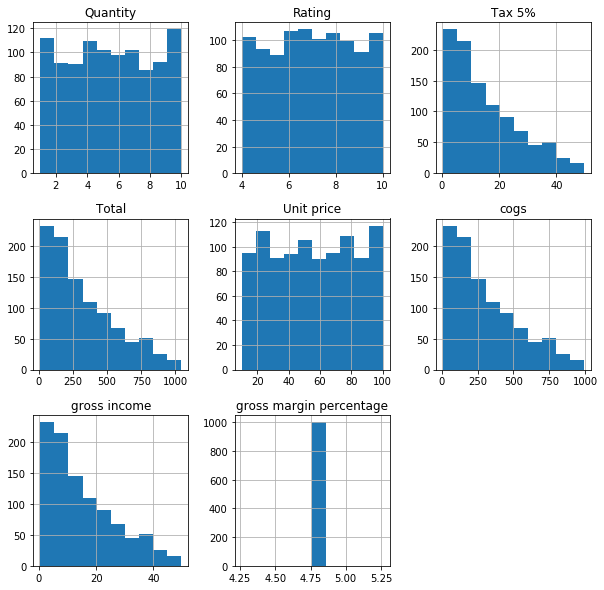

In [5]:
df.hist(figsize=(10,10));

All numerical variable data looks great.  
There are no outliers in the data.    
**gross margin percentage** is constant which makes sense.  

**Note**: We have analyzed class variables below in the following questions

#### Checking for missing values

In [6]:
df.isnull().values.any(axis=1).sum() # Checking if there are any missing values

0

As can be seen, this data doesn't have any missing values which is **great**

#### Checking for duplicate rows

In [7]:
df.shape # Size of original dataframe

(1000, 17)

In [8]:
df.drop_duplicates().shape # Size of dataframe after dropping the duplicate rows

(1000, 17)

Above two lines suggest that there are no duplicate records

## Questions

#### Question 1: Which City has highest total gross income?

In [9]:
gross_income = df.groupby(['City']).agg(GrossIncome = ('gross income', 'sum'))
gross_income

,GrossIncome
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


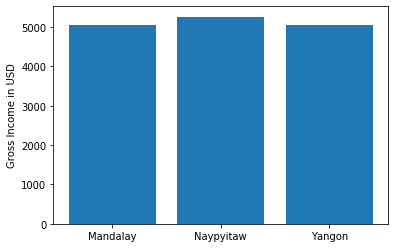

In [10]:
plt.bar(gross_income.index, height = list(gross_income['GrossIncome']));
plt.ylabel("Gross Income in USD");

As can be seen in the above graph, total gross income is highest for the **Naypyitaw** city = $5265.18

#### Question 2: What are total spendings based on Member status and Gender?

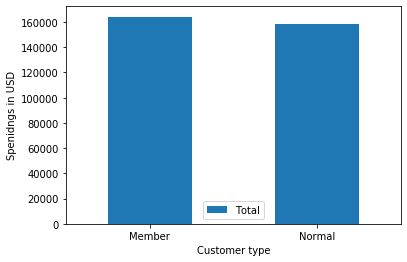

In [11]:
df.groupby(['Customer type']).agg({'Total':'sum'}).plot.bar(rot=0);
plt.ylabel("Spenidngs in USD");

Members spend more than Non-Members by **$5480.14**

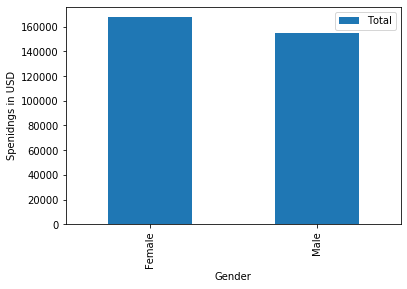

In [12]:
df.groupby(['Gender']).agg({'Total':'sum'}).plot.bar();
plt.ylabel("Spenidngs in USD");

Females spend more than Males by **$12,799.1**

#### Question 3: Which is the most common mode of payment for Members/Non-Members?

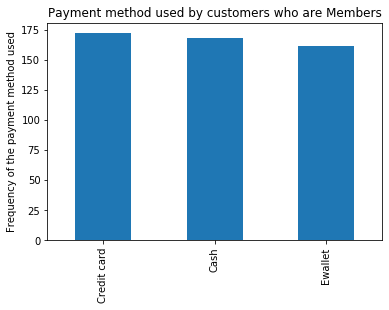

In [13]:
(df.loc[df['Customer type']=='Member']['Payment'].value_counts()).plot.bar();
plt.ylabel("Frequency of the payment method used");
plt.title('Payment method used by customers who are Members');

As can be seen, majority of members use **Credit Card** to pay their bills

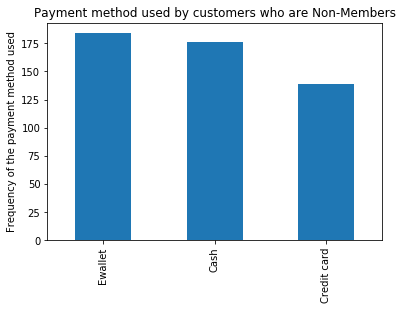

In [14]:
(df.loc[df['Customer type']=='Normal']['Payment'].value_counts()).plot.bar();
plt.ylabel("Frequency of the payment method used");
plt.title('Payment method used by customers who are Non-Members');

As can be seen, majority of members use **Ewallet** to pay their bills

One of the possiblities for the change in the payment methods is that Supermarket might have their own credit card (Eg: Walmart Capital One card), which gives higher cashback for the member customers of the supermarket  

If that's the case, supermarket can increase its advertising budget and create more awareness about its credit card. It will have two-fold benefits:  

1. Normal customers might switch to member customers (which can increase membership revenues, if there are any)  

2. It will eventually increase the credit card transaction revenue, which can give some bargaining power for lower transaction fee to the services like VISA, MasterCard, etc.



#### Question 4: Investigating the time of purchase for the year 2019

In [15]:
def time_convert(string1): # Function to convert Time in string format to minutes in int
    ''' Takes in the time in the string format HH:MM, returns the int format time in minutes. It has only one argument, i.e., string1 which is a string HH:MM'''
    
    string1_1 = int(string1[:2]) # Fetching the hrs
    string1_2 = int(string1[-2:]) # Fetching the mins
    
    final = (string1_1*60) + string1_2
    
    return final

In [16]:
df['Time'] = df['Time'].apply(lambda x : time_convert(x)) # This converts Hrs:Min time to Total minutes

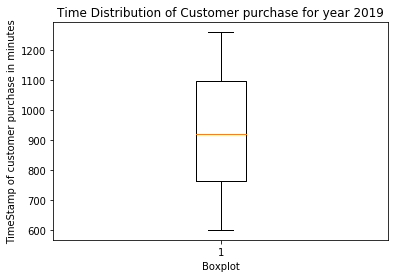

In [17]:
plt.boxplot(df['Time']); # This is the boxplot for the entire year
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot');
plt.ylabel('TimeStamp of customer purchase in minutes');

In [18]:
df['Time'].describe()

count    1000.000000
mean      924.698000
std       191.527788
min       600.000000
25%       763.000000
50%       919.000000
75%      1095.000000
max      1259.000000
Name: Time, dtype: float64

As we can see, minimum time is 600, meaning store opens at **10:00** AM in the morning and maximum time for transaction is 1259, meaning store closes at **9:00 PM**

First quartile (25%) customers do shopping between 10:00 AM to 12:43 PM  
Next quartile customers do shopping between 12:43 PM to 3:20 PM  
Next quartile customers do shopping between 3:20 PM to 6:15 PM  
Fourth quartile customers do shopping between 6:15 PM to 9:00 PM  

Distribution of footfall is almost evenly distributed across the time.  

**One of the ways to increase revenue might be to increase the store hours. For that, we need to do the Cost-Benefit analysis (for which we don't have sufficient data)**

In [19]:
df['Month'] = df['Date'].apply(lambda x : int((x.split('/'))[0])) # Adding a column that tracks the month of the purchase in the year 2019

In [20]:
df['Month'].unique()

array([1, 3, 2], dtype=int64)

This tells us that above data is for **first** quarter of the year 2019

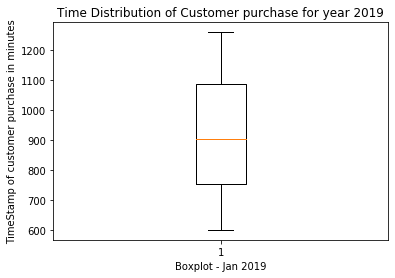

In [21]:
plt.boxplot(df.loc[df['Month']==1]['Time']); # This is the boxplot for Jan-2019
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot - Jan 2019');
plt.ylabel('TimeStamp of customer purchase in minutes');

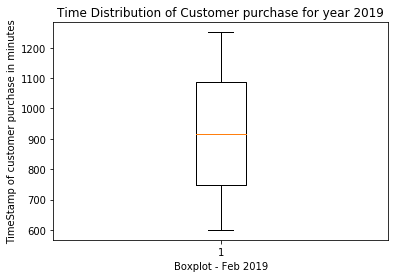

In [22]:
plt.boxplot(df.loc[df['Month']==2]['Time']); # This is the boxplot for Feb-2019
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot - Feb 2019');
plt.ylabel('TimeStamp of customer purchase in minutes');

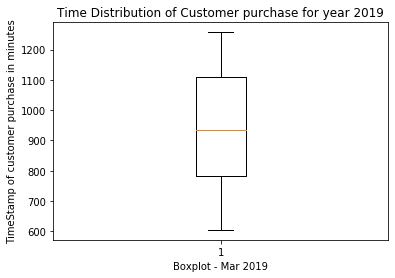

In [23]:
plt.boxplot(df.loc[df['Month']==3]['Time']); # This is the boxplot for Mar-2019
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot - Mar 2019');
plt.ylabel('TimeStamp of customer purchase in minutes');

Looks like, as compared to Feb and March, in Jan there were less footfall ratio in the third quartile of the time. This might be because **of the cold january weather in the evenings**  

Supermarket can run some discounts for items like alcohol, party items, etc. to boost revenues during this time

#### Question 5: Investigating the purchase categories

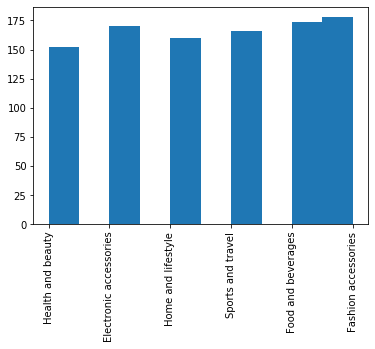

In [24]:
p = plt.hist(df['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for the year 2019. Customers bought most in **Fashion Accessories** category

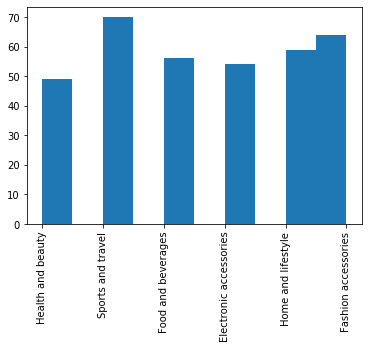

In [25]:
p = plt.hist(df.loc[df['Month']==1]['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for Jan - 2019. Customers bought most in **Sports and Travel** category. This makes sense as many people go and skiing expeditions and buy related apparels

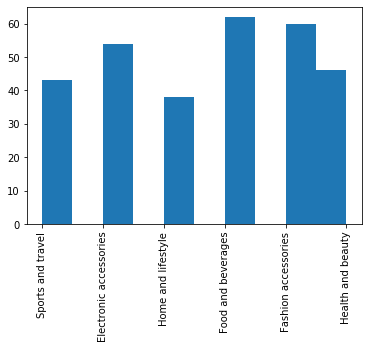

In [26]:
p = plt.hist(df.loc[df['Month']==2]['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for Feb - 2019. Customers bought more in **Food and beverages** category.  

Generally, temperatures start rising after January. People start going out and dine. Also there are NFL superbowls in the month of February.

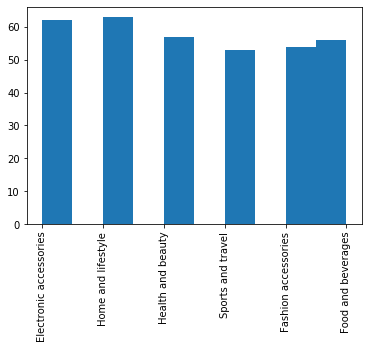

In [27]:
p = plt.hist(df.loc[df['Month']==3]['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for Mar - 2019. Customers bought most in **Home and Lifestyle** category

We see that in Q1-2019, customers were shopping more of Fashion Accessories (in terms of category)  
For Jan-2019, **Sports and Travel** was the most purchased category  
For Feb-2019, **Food and Beverages** was the most purchased category (maybe because of NFL superbowl home parties)   
For Mar-2019, **Home and Lifestyle** was the most purchased category  

Supermarket may provide addtional discounts on least sold category each month. This can be called **Rotating Category** and can also help in increasing membership by giving disounts only to the members

#### Question 6: Investigating the Ratings submitted by the Customers

In [28]:
df.groupby(['Customer type']).agg(RatingMean = ('Rating', 'mean'))

,RatingMean
Customer type,
Member,6.940319
Normal,7.005210


Its surprising to see that Members have relatively lower rating as compared to Normal customers.  

This might imply that products available are diverse enough and customers are happy because Normal customer ratings are 7 (which is decent). But it looks like the benefits provided to the members are not at par and as a result there is a chance for members to close their membership

In [29]:
df.groupby(['Customer type','Gender']).agg(RatingMean = ('Rating', 'mean'))

RatingMean
Customer type Gender            
Member        Female    6.940613
              Male      6.940000
Normal        Female    6.990417
              Male      7.018919

Female members provide higher rating then Male customers  
Among non-members, Male ratings were higher than female ratings  
Supermarket might think of catering more to its Male members by adding more benefits to its Male Members